In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/UCI_Credit_Card.csv")
df.head()

ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default.payment.next.month
0   1    20000.0    2  ...       0.0       0.0                           1
1   2   120000.0    2  ...       0.0    2000.0                           1
2   3    90000.0    2  ...    1000.0    5000.0                           0
3   4    50000.0    2  ...    1069.0    1000.0                           0
4   5    50000.0    1  ...     689.0     679.0                           0

[5 rows x 25 columns]

In [4]:
X=df.drop('default.payment.next.month',axis=1)
y=df['default.payment.next.month']

In [5]:
from sklearn.model_selection import train_test_split

# First divide train and test data in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [6]:
# Then further divide the test set in 50:50 ratio into validation set and test set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50)

In [7]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=5)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
predictions = dtree.predict(X_val)

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

score1=accuracy_score(y_val,predictions)
print(score1)

0.8084444444444444


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


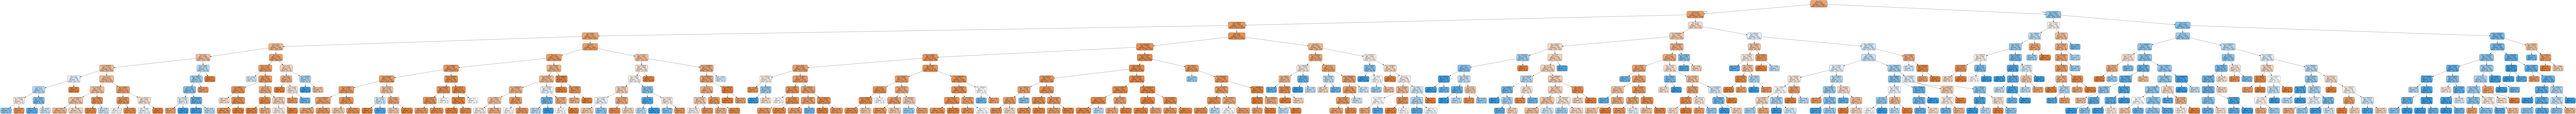

In [13]:
# Tree visualization

from sklearn.externals.six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())